In [3]:
from pathlib import Path
import json
import pandas as pd

root = Path('/mnt/ssd-1/nora/real-lenses/pythia/125m/across-time')
items = sorted(
    (int(p.parent.stem[4:]), p)
    for p in root.glob('**/eval.json')
)

baseline_records = []
ce_records = []
kl_records = []

for step, path in items:
    with open(path) as f:
        data = json.load(f)
    
    baseline_records.append({
        'step': step,
        **data['baseline'],
    })
    ce_records.append({
        'step': step,
        **data['ce'],
    })
    kl_records.append({
        'step': step,
        **data['kl'],
    })

In [77]:
from tuned_lens.stats import effective_rank
import torch as th

rank_items = sorted(
    (int(p.parent.stem[4:]), th.load(p).covariance().map(lambda x: effective_rank(x).cpu()))
    for p in root.glob('**/stream_stats.pt')
)

logdet_items = sorted(
    (int(p.parent.stem[4:]), th.load(p).covariance().map(lambda x: x.logdet().cpu()))
    for p in root.glob('**/stream_stats.pt')
)

trace_items = sorted(
    (int(p.parent.stem[4:]), th.load(p).covariance().map(lambda x: x.trace().cpu()))
    for p in root.glob('**/stream_stats.pt')
)

<AxesSubplot: title={'center': 'Pythia 125M effective hidden state dimensionality across time'}, xlabel='Layer', ylabel='Effective rank of covariance matrix'>

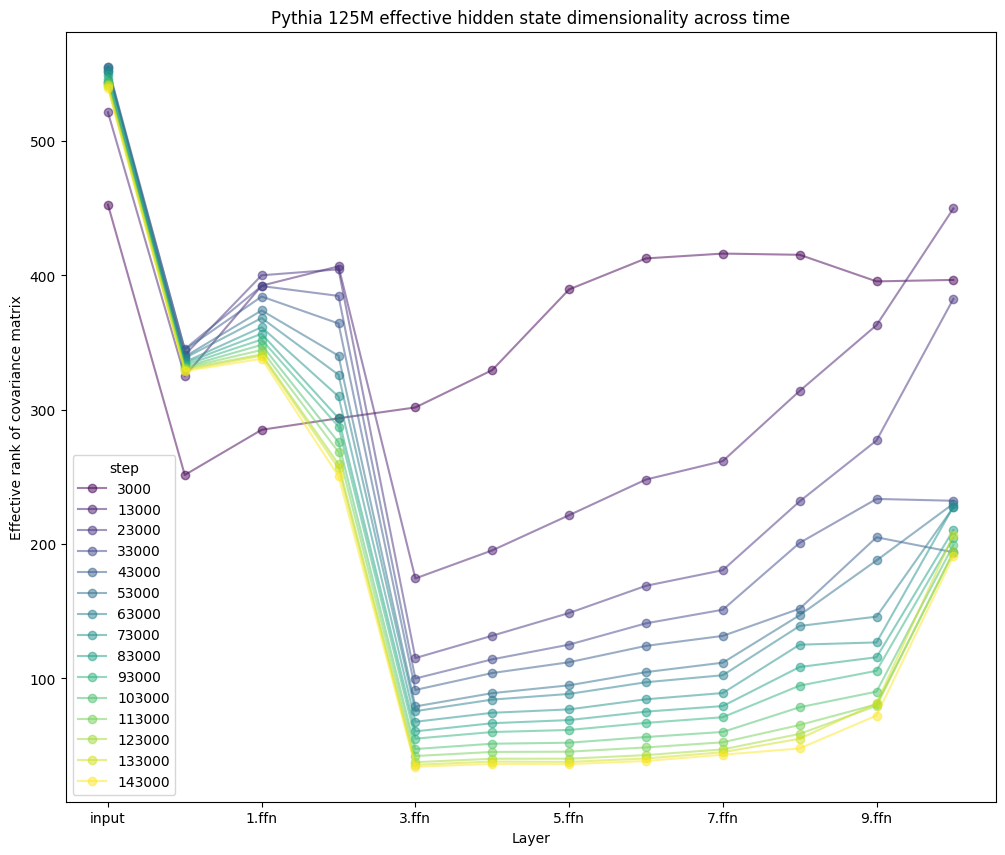

In [71]:
rank_records = []

for step, stream in rank_items:
    record = {'step': step}

    for k, v in stream.items():
        record[k] = v.item()
    
    rank_records.append(record)

rank_df = pd.DataFrame.from_records(rank_records, index='step')
rank_df.transpose().plot(
    alpha=0.5,
    colormap='viridis',
    figsize=(12, 10),
    marker='o',
    title="Pythia 125M effective hidden state dimensionality across time",
    xlabel="Layer",
    ylabel="Effective rank of covariance matrix",
)

<AxesSubplot: title={'center': 'Pythia 125M hidden state variance across time'}, xlabel='Step', ylabel='Covariance trace'>

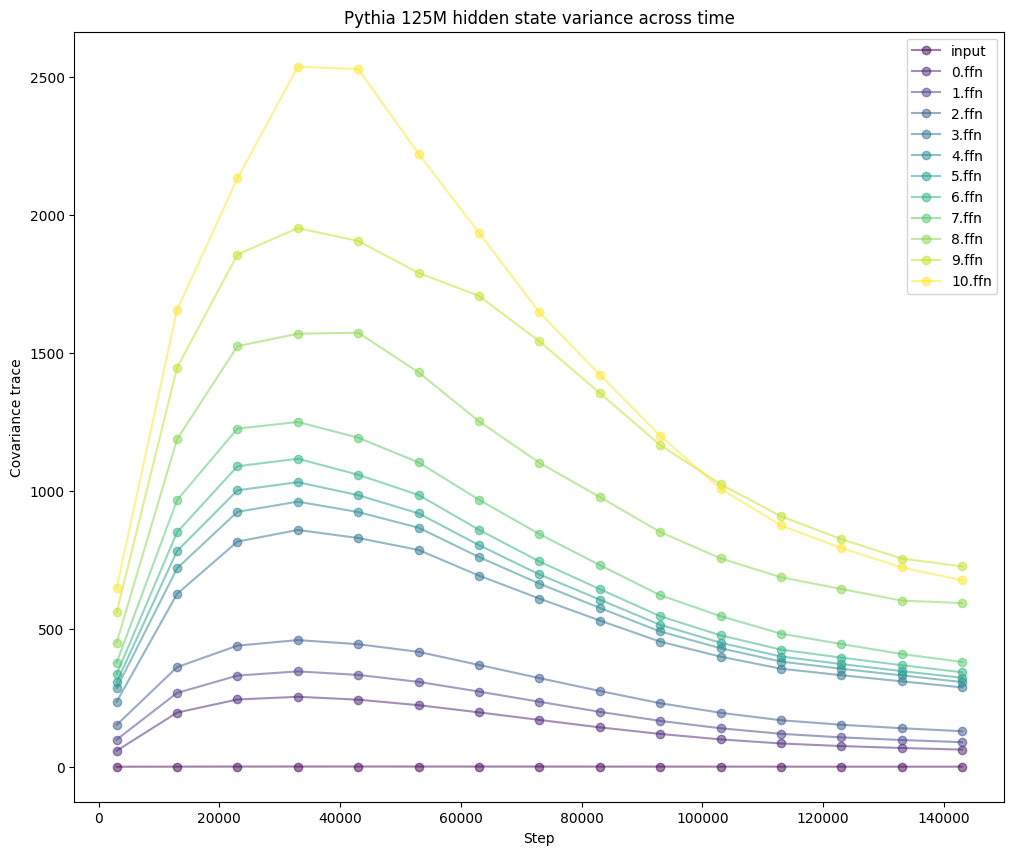

In [79]:
trace_records = []

for step, stream in trace_items:
    record = {'step': step}

    for k, v in stream.items():
        record[k] = v.item()
    
    trace_records.append(record)

trace_df = pd.DataFrame.from_records(trace_records, index='step')
trace_df.plot(
    alpha=0.5,
    colormap='viridis',
    figsize=(12, 10),
    marker='o',
    title="Pythia 125M hidden state variance across time",
    xlabel="Step",
    ylabel="Covariance trace",
)

<AxesSubplot: title={'center': 'Pythia 125M Logit Lens CE Across Time'}, xlabel='Layer', ylabel='Bits per Byte'>

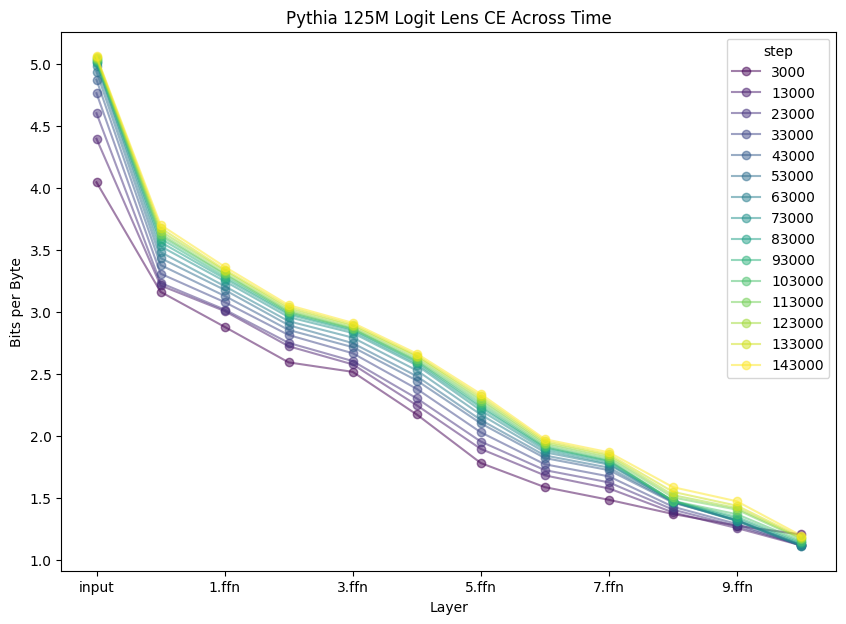

In [35]:
import matplotlib.pyplot as plt

df = pd.DataFrame.from_records(baseline_records, index='step')
df.transpose().plot(
    alpha=0.5,
    colormap='viridis',
    figsize=(10, 7),
    marker='o',
    title="Pythia 125M Logit Lens CE Across Time",
    xlabel="Layer",
    ylabel="Bits per Byte",
)

In [16]:
pd.DataFrame.from_records(kl_records).pivot(columns='step')

input                                                           \
step   3000      13000    23000     33000   43000     53000     63000    
0     1.53224       NaN      NaN       NaN     NaN       NaN       NaN   
1         NaN  1.681941      NaN       NaN     NaN       NaN       NaN   
2         NaN       NaN  1.69021       NaN     NaN       NaN       NaN   
3         NaN       NaN      NaN  1.692408     NaN       NaN       NaN   
4         NaN       NaN      NaN       NaN  1.6674       NaN       NaN   
5         NaN       NaN      NaN       NaN     NaN  1.691113       NaN   
6         NaN       NaN      NaN       NaN     NaN       NaN  1.704234   
7         NaN       NaN      NaN       NaN     NaN       NaN       NaN   
8         NaN       NaN      NaN       NaN     NaN       NaN       NaN   
9         NaN       NaN      NaN       NaN     NaN       NaN       NaN   
10        NaN       NaN      NaN       NaN     NaN       NaN       NaN   
11        NaN       NaN      NaN       NaN     NaN       NaN       NaN   
12        NaN       NaN      NaN       NaN     NaN       NaN       NaN   
13        NaN       NaN      NaN       NaN     NaN       NaN       NaN   
14        NaN       NaN      NaN       NaN     NaN       NaN       NaN   

                                    ...    10.ffn                      \
step    73000     83000     93000   ...    53000     63000     73000    
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1          NaN       NaN       NaN  ...       NaN       NaN       NaN   
2          NaN       NaN       NaN  ...       NaN       NaN       NaN   
3          NaN       NaN       NaN  ...       NaN       NaN       NaN   
4          NaN       NaN       NaN  ...       NaN       NaN       NaN   
5          NaN       NaN       NaN  ...  0.087739       NaN       NaN   
6          NaN       NaN       NaN  ...       NaN  0.090695       NaN   
7     1.705472       NaN       NaN  ...       NaN       NaN  0.095052   
8          NaN  1.734006       NaN  ...       NaN       NaN       NaN   
9          NaN       NaN  1.745705  ...       NaN       NaN       NaN   
10         NaN       NaN       NaN  ...       NaN       NaN       NaN   
11         NaN       NaN       NaN  ...       NaN       NaN       NaN   
12         NaN       NaN       NaN  ...       NaN       NaN       NaN   
13         NaN       NaN       NaN  ...       NaN       NaN       NaN   
14         NaN       NaN       NaN  ...       NaN       NaN       NaN   

                                                                            
step    83000     93000     103000    113000    123000    133000    143000  
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
5          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
6          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
7          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
8     0.099818       NaN       NaN       NaN       NaN       NaN       NaN  
9          NaN  0.103076       NaN       NaN       NaN       NaN       NaN  
10         NaN       NaN  0.106795       NaN       NaN       NaN       NaN  
11         NaN       NaN       NaN  0.110909       NaN       NaN       NaN  
12         NaN       NaN       NaN       NaN  0.113214       NaN       NaN  
13         NaN       NaN       NaN       NaN       NaN  0.117108       NaN  
14         NaN       NaN       NaN       NaN       NaN       NaN  0.118617  

[15 rows x 180 columns]